<a href="https://www.kaggle.com/code/jigarpatel108/linear-regression-using-scikit-learn-365ds-ml?scriptVersionId=163758521" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center> Linear Regression using 'Scikit-Learn' </center>
# <center> Machine Learning in Python<br> *(A 365 Data Science Program)* </center>

## This notebook contains the solutions to the exercises provided in the 'Machine Learning in Python' course offered by 365 Data Science Team & coded by me. It also contains some of the practice sets used in the said course.
## ~
## by Jigar Patel
--------------------

* [1. Linear Regression using Scikit-learn](#1)
    - [1.1 Simple Linear Regression Model using GPA and SAT scores](#2)
    - [1.2 Predicting values using the SLR model](#3)
* [2. Multiple Linear Regression using Scikit-Learn](#4)
    - [2.1 Multiple Linear Regression Model using GPA, SAT and Random Scores](#5)
    - [2.2 Feature selection using p-values](#6)
* [3. Splitting a Dataset into Train and Test data using Scikit-Learn](#7)
--------------------

<a id="1"></a>
# 1. Simple Linear Regression using Scikit-Learn

<a id="2"></a>
##  1.1 Simple Linear Regression Model using GPA and SAT scores

In [1]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('/kaggle/input/sklearn/lin_reg_sklearn_all_datasets/sat_vs_gpa.csv')

In [3]:
# Descriptive statistics of the given data
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


#### Note that:
#### The SAT Scores are the total of Critical Reasoning + Mathematics + Writing.
#### The GPA is the Grade Point Average (at Graduation from University)
#### Using Simple Linear Regression we will predict the SAT score from the GPA score of a student

In [4]:
# Defining the target and features
# There is a single feature i.e. 'SAT'
x = raw_data['SAT']

# The target for our model is the 'GPA'
y = raw_data['GPA']

In [5]:
# Before fitting the model using sklearn, we need to convert all data frames into ndarray
# Checking the shapes of our inputs
x.shape

(84,)

In [6]:
y.shape

(84,)

#### Here we observe that all our inputs are both vectors of length 84

In [7]:
# In order to feed x to sklearn, it should be a 2D array (a matrix).
# Therefore we will have to reshape it.
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)
x_reshaped = x.values.reshape(84,1)

# We asertain the shape
x_reshaped.shape

(84, 1)

In [8]:
# Creating an instance of the LinearRegression class
regr = LinearRegression()

In [9]:
# Fitting the regression model
regr.fit(x_reshaped, y)

LinearRegression()

In [10]:
# R-Squared of the linear regression
regr.score(x_reshaped, y)

0.40600391479679754

#### This model having the SAT score of the student explains 40.60% of the variation in the GPA score the student ($R^2 = 0.406$)

In [11]:
# Getting the co-efficient of the linear regression equation
regr.coef_

array([0.00165569])

In [12]:
#Getting the intercept of the linear regression
regr.intercept_

0.2750402996602799

#### Finally, the linear regression equation we get is:
#### $ GPA = 0.275 + 0.0017*SAT $

Text(0, 0.5, 'GPA')

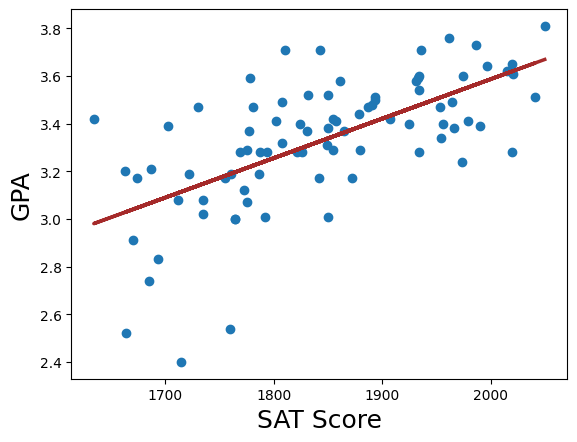

In [13]:
# Plotting the regression line
plt.scatter(x,y)
yhat = regr.coef_*x_reshaped + regr.intercept_
fig = plt.plot(x, yhat,lw=2.5, c="brown", label ='regression line')
plt.xlabel('SAT Score', fontsize = 18)
plt.ylabel('GPA', fontsize = 18)

<a id="3"></a>
#### Now we predict the GPA scores of the following students using the above model:
#### 1. Alice who scored 1720 in SAT
#### 2. Bob who scored 1800 in SAT

In [14]:
# Having a glance at the variable 
x_reshaped

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [15]:
to_predict= pd.DataFrame({'SAT': [1720,1800]})
to_predict

,SAT
0,1720
1,1800


In [16]:
to_predict.rename(index ={0:'Alice', 1:'Bob'}, inplace=True)
to_predict

,SAT
Alice,1720
Bob,1800


In [17]:
predictions = regr.predict(to_predict)
predicted_data = pd.DataFrame({'Predicted GPA': [predictions[0],predictions[1]]})
predicted_data.rename(index ={0:'Alice', 1:'Bob'}, inplace=True)
predicted_data

,Predicted GPA
Alice,3.122824
Bob,3.255279


#### As per the above model, the predicted GPA of Alice is 3.12 while the predicted score of Bob is 3.26.
-------------------------------

<a id="4"></a>
# 2. Multiple Linear Regression Model using Scikit-Learn

<a id="5"></a>
# 2.1 Multiple Linear Regression Model using GPA, SAT & Random Scores

In [18]:
# Loading the required data
data_multreg = pd.read_csv('/kaggle/input/sklearn/lin_reg_sklearn_all_datasets/sat_vs_gpa_mult_regr.csv')
data_multreg

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [19]:
# Declaring the dependent and independent variables
x = data_multreg[['SAT', 'Rand 1,2,3']]
y = data_multreg[['GPA']]

In [20]:
# Creating an instance of the Linear Regression class
mult_reg = LinearRegression()

In [21]:
# Fitting the regression. There is no need to reshape any input variables as sklearn is optimised for multiple linear regression
mult_reg.fit(x,y)

LinearRegression()

In [22]:
# R-Squared of the linear regression
mult_reg.score(x, y)

0.4066811952814283

#### Here we noticed that: $ R^2 = 0.4067 $
#### i.e. SAT scores & Random 1,2,3 only explain 40.67% of GPA

In [23]:
# Calculating the co-efficient of the multiple linear regression
mult_reg.coef_

array([[ 0.00165354, -0.00826982]])

In [24]:
# Getting the intercept of the linear regression
mult_reg.intercept_

array([0.29603261])

#### Finally, the multiple linear regression equation we get is:
#### $ GPA = 0.296 + 0.0016*SAT - 0.0082*Rand $

#### We now calculate the adjusted R-Squred for the above regression model to measure it's goodness of fit

#### The formula for adjusted R-Squared is:
#### $R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$
#### *(where n = no. of observations and p = no. of predictors)*

In [25]:
# Finding n & p, the shape of x will give us the number of observations & the nuber of predictors used
x.shape

(84, 2)

In [26]:
# Inserting the values in the formula for adjusted R-Squared
r2 = mult_reg.score(x,y)
n = 84
p = 2
adj_r2 = [1-(1-r2)*((n-1)/(n-p-1))]
adj_r2

[0.3920313482513401]

#### We got the $R^2_{adj.} = 0.3920 $

#### Since in our case, $R^2_{adj.} < R^2 $, one or more than one of the predictors have very little or no explanatory power.

<a id="6"></a> 
# 2.2 Feature Selection using p-values

#### In feature selection we will keep those features that contribute the most to the target and remove the rest.
#### In other words we detect the variables that are not needed in our model.
#### We will use the feature selection module (F_Regression) that will generate simple linear regression of each of the features (independent variables) with the target (dependent variable).
#### In this case it will generate two simple regressions, one between SAT score and GPA, and the other between Random score and GPA.


In [27]:
# Importing the relevant method

from sklearn.feature_selection import f_regression

In [28]:
# We call the method f-regression with arguments as the features (x) and the target (y).
# This method will return two values, first the F-value and second the p-value.
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [29]:
# As we are interested purely in the p-values, we extract only that value from the above arrays.

p_values = f_regression(x,y)[1]
p_values_rounded = p_values.round(4)

print('The p-value of the feature SAT Score is:', p_values_rounded[0],'.\n'
'While the p-value of the feature Rand 1,2,3 is:', p_values_rounded[1])

The p-value of the feature SAT Score is: 0.0 .
While the p-value of the feature Rand 1,2,3 is: 0.6763


#### We need to note that the above are univariate pvalues that are obtained from simple linear regression models of each feature. They do not reflect the interconnections of the features.

#### Let us now create a final summary table of our model:

In [30]:
summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
summary['Coefficients'] = mult_reg.coef_[0]
summary['p-values'] =  p_values_rounded
summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.0000
1,"Rand 1,2,3",-0.008270,0.6763


---------------------------------------

<a id="7"></a>
# 3. Splitting a Dataset into Train and Test data using Scikit-Learn

#### In order to evaluate the performance of the machine learning algorithm, train-test split method is used.
#### This train-test splitting can be used for any classification or regression problem, and for any supervised machine learning model.
#### Here we evaluate how our machine learning model performs when we use it on new data i.e. data which was not used to train/form the model.
#### It involves splitting the data set we have into two datasets, the training dataset and the testing dataset (usually 80-20%).
#### We train the model on the training dataset but test the model on the testing dataset.

In [31]:
# Importing the relevant libraries for train-test split

import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
# Generating some random data of 100 mumbers

example_data = np.arange(1,101)
example_data

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [33]:
# Splitting the data using the default settings
# Defining the train and test variables

example_train, example_test = train_test_split(example_data)

In [34]:
# Observing the train data

example_train

array([ 95,   3,  49,  53,  23,  36,  74,  84,  68,  80,  29,  41,  32,
        28,  45,  24,  21,  92,  15,   4,  96,  55,  81,  37,  62,  93,
         2,  10,  14,  11,  48,  72,  73,  42,  70,  97,  39,  44,  71,
        52,  56,  12,  77, 100,  89,   8,  91,  30,  50,  69,  90,  58,
        79,  16,   9,  20,  83,  31,  13,  35,  54,  59,  61,  87,  17,
        88,  98,  63,  51,  67,  33,  18,  57,  82,   6])

In [35]:
# Observing the test data

example_test

array([99, 25, 86, 26, 75, 38,  7, 85, 34, 46, 94, 19, 65, 47, 43,  1, 60,
       64, 78, 66, 27, 40,  5, 22, 76])

In [36]:
# Checking the shapes of the two defined variables

print("Shape of the train data is", (example_train.shape))
print("Shape of the test data is", (example_test.shape))

Shape of the train data is (75,)
Shape of the test data is (25,)


#### We observe that the default train-test split is 75%-25%.
#### We also observe that the master data was shuffled and then fed to the train and test variables.

In [37]:
# Playing with the attributes and changing the split percentages and shuffling.
# Changing the train-test split to 80%-20% and ensuring the master data is not shuffled

example_train, example_test = train_test_split(example_data, train_size=0.8, shuffle=False)

In [38]:
# Observing the train and test data, and their shapes for the changes made

print("Train dataset:\n", (example_train))
print("Test dataset: \n", (example_test))
print("Shape of the train data is: \n", (example_train.shape))
print("Shape of the test data is: \n", (example_test.shape))

Train dataset:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80]
Test dataset: 
 [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100]
Shape of the train data is: 
 (80,)
Shape of the test data is: 
 (20,)


-------------------------------------------------